### RandomForestRegressor model:

- Comparing the performance of two different register allocation methods (graph coloring and linear scan) using RandomForestRegressor models.
- Quantifying the accuracy of the predictions made by these models using evaluation metrics like Mean Absolute Error, Mean Squared Error, and R-squared values.
- Visualizing the actual and predicted execution times on a scatter plot, which can help you to better understand the relationship between the two register allocation methods and how well the machine learning models are predicting their performance.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("dataset.csv")

# Extract features and target
X = data.index.to_frame()  # Using index as a feature (consider extracting more meaningful features)
y_gc = data["graph_coloring_exec_time"]
y_ls = data["linear_scan_exec_time"]

# Split the data into training and testing sets
X_train, X_test, y_gc_train, y_gc_test, y_ls_train, y_ls_test = train_test_split(X, y_gc, y_ls, test_size=0.3, random_state=42)

# Train the RandomForestRegressor for graph coloring
gc_regr = RandomForestRegressor(n_estimators=100, random_state=42)
gc_regr.fit(X_train, y_gc_train)

# Train the RandomForestRegressor for linear scan
ls_regr = RandomForestRegressor(n_estimators=100, random_state=42)
ls_regr.fit(X_train, y_ls_train)

# Predict execution times
gc_pred = gc_regr.predict(X_test)
ls_pred = ls_regr.predict(X_test)

# Evaluate the model performance
print("Graph Coloring Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_gc_test, gc_pred))
print("Mean Squared Error:", mean_squared_error(y_gc_test, gc_pred))
print("R-squared:", r2_score(y_gc_test, gc_pred))

print("\nLinear Scan Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_ls_test, ls_pred))
print("Mean Squared Error:", mean_squared_error(y_ls_test, ls_pred))
print("R-squared:", r2_score(y_ls_test, ls_pred))

Graph Coloring Model Performance:
Mean Absolute Error: 0.0006024312973022519
Mean Squared Error: 4.824246341551303e-07
R-squared: -7.19306246227719

Linear Scan Model Performance:
Mean Absolute Error: 0.00023680210113526993
Mean Squared Error: 8.825780410385959e-08
R-squared: -3.9404478160157943


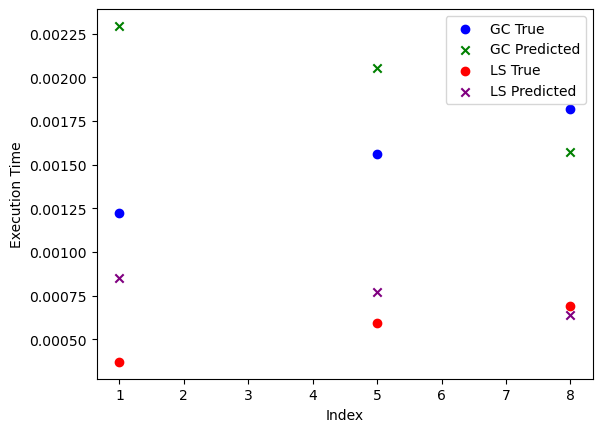

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_gc_test, color='blue', label='GC True')
plt.scatter(X_test, gc_pred, color='green', marker='x', label='GC Predicted')
plt.scatter(X_test, y_ls_test, color='red', label='LS True')
plt.scatter(X_test, ls_pred, color='purple', marker='x', label='LS Predicted')
plt.xlabel('Index')
plt.ylabel('Execution Time')
plt.legend()
plt.show()


### This creates a bar chart that compares the execution times of the graph coloring and linear scan methods for each file. The file names are on the x-axis, and the execution times are on the y-axis. The graph coloring times are shown in blue, and the linear scan times are shown in orange.


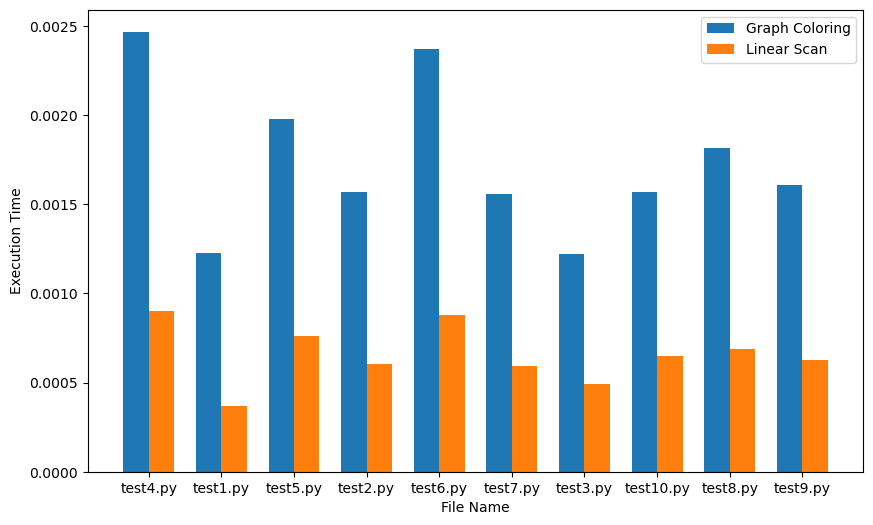

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("dataset.csv")


# Convert the dataset into a DataFrame
df = pd.DataFrame(data, columns=["file_name", "graph_coloring_exec_time", "linear_scan_exec_time"])

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Set the x-axis positions
x = np.arange(len(df))

# Plot the graph coloring execution times
plt.bar(x - bar_width / 2, df["graph_coloring_exec_time"], width=bar_width, label="Graph Coloring")

# Plot the linear scan execution times
plt.bar(x + bar_width / 2, df["linear_scan_exec_time"], width=bar_width, label="Linear Scan")

# Set the x-axis labels
plt.xticks(x, df["file_name"])

# Set the x-axis and y-axis labels
plt.xlabel("File Name")
plt.ylabel("Execution Time")

# Add a legend
plt.legend()

# Show the plot
plt.show()
